# Catboost

## ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()

/Users/atsus/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/atsus/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/atsus/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/atsus/opt/anaconda3/envs

## データセットのインポート

In [2]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [3]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
test_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
train_dataset.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
test_dataset.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
train_dataset['drop'] = 0
test_dataset['drop'] = 1

In [8]:
dataset = test_dataset.append(train_dataset, sort=False).reset_index(drop=True)

In [9]:
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,drop,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,NaN
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,NaN
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,NaN
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,NaN
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,False
12966,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,False
12967,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,0,True
12968,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,False


In [10]:
dataset.groupby('HomePlanet').count().index.to_list()

['Earth', 'Europa', 'Mars']

In [11]:
dataset.groupby('Cabin').count().index.to_list()

['A/0/P',
 'A/0/S',
 'A/1/P',
 'A/1/S',
 'A/10/P',
 'A/10/S',
 'A/100/S',
 'A/101/S',
 'A/102/S',
 'A/103/S',
 'A/104/S',
 'A/105/S',
 'A/106/S',
 'A/107/S',
 'A/108/S',
 'A/109/S',
 'A/11/P',
 'A/11/S',
 'A/12/P',
 'A/12/S',
 'A/13/P',
 'A/13/S',
 'A/14/P',
 'A/14/S',
 'A/15/P',
 'A/15/S',
 'A/16/P',
 'A/16/S',
 'A/17/P',
 'A/17/S',
 'A/18/P',
 'A/18/S',
 'A/19/P',
 'A/19/S',
 'A/2/P',
 'A/2/S',
 'A/20/P',
 'A/20/S',
 'A/21/P',
 'A/21/S',
 'A/22/P',
 'A/22/S',
 'A/23/P',
 'A/23/S',
 'A/24/P',
 'A/24/S',
 'A/25/P',
 'A/25/S',
 'A/26/P',
 'A/26/S',
 'A/27/P',
 'A/27/S',
 'A/28/P',
 'A/28/S',
 'A/29/P',
 'A/29/S',
 'A/3/P',
 'A/3/S',
 'A/30/P',
 'A/30/S',
 'A/31/P',
 'A/31/S',
 'A/32/P',
 'A/32/S',
 'A/33/P',
 'A/33/S',
 'A/34/P',
 'A/34/S',
 'A/35/P',
 'A/35/S',
 'A/36/P',
 'A/36/S',
 'A/37/P',
 'A/37/S',
 'A/38/P',
 'A/38/S',
 'A/39/P',
 'A/39/S',
 'A/4/P',
 'A/4/S',
 'A/40/P',
 'A/40/S',
 'A/41/P',
 'A/41/S',
 'A/42/P',
 'A/42/S',
 'A/43/P',
 'A/43/S',
 'A/44/P',
 'A/44/S',
 'A/45/P',

In [12]:
dataset.groupby('Destination').count().index.to_list()

['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']

In [13]:
dataset.groupby('Name').count().index.to_list()

['Aard Backo',
 'Aard Curle',
 'Aard Kraie',
 'Aarjel Jaff',
 'Aarjel Rhuba',
 'Aarjel Vlate',
 'Aark Ane',
 'Aark Ches',
 'Aark Homin',
 'Aark Man',
 'Aarone Batestonley',
 'Aarone Burryerson',
 'Aarone Castannison',
 'Aarone Fowlaney',
 'Aarone Fredersend',
 'Aarone Hoppers',
 'Aarone Lewintos',
 'Aarone Monroellynn',
 'Aarone Patrichane',
 'Aarone Sweett',
 'Aars Pare',
 'Acceleb Alutorody',
 'Acceleb Mormonized',
 'Acceleb Rimplighty',
 'Acceleb Unrent',
 'Achah Cassiding',
 'Achah Stpingepid',
 'Achbah Emetillove',
 'Achbah Fansty',
 'Achbah Forous',
 'Achbah Fueling',
 'Achib Dischod',
 'Achib Heedry',
 'Achib Ingascomet',
 'Achib Pirejus',
 'Achib Unteckery',
 'Achira Capplid',
 'Achira Reewerpic',
 'Achira Uncionted',
 'Achira Unhaftimle',
 'Achiram Ainatint',
 'Achiram Ambleeve',
 'Achiram Prefule',
 'Achiram Turtertive',
 'Achirk Tairbatic',
 'Achium Alenter',
 'Achium Entratable',
 'Achium Hometerval',
 'Achium Inderad',
 'Achium Pokematic',
 'Achyon Nalanet',
 'Achyon Obeda

In [14]:
dataset1 = dataset.drop('Name', axis=1)

In [15]:
dataset1.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
drop               0
Transported     4277
dtype: int64

In [16]:
dataset1['Group'] = dataset1['PassengerId'].str.extract('(\d\d\d\d)_', expand=True)
dataset1['ID'] = dataset1['PassengerId'].str.extract('_(\d\d)')

dataset1['Deck'] = dataset1['Cabin'].str.extract('([A-Z])/', expand=True)
dataset1['Deck_No'] = dataset1['Cabin'].str.extract('(\d)/', expand=True)
dataset1['Side'] = dataset1['Cabin'].str.extract('/([A-Z])', expand=True)

dataset1['Bill'] = dataset1['RoomService'] + dataset1['FoodCourt'] + dataset1['ShoppingMall'] + dataset1['Spa']  + dataset1['VRDeck']

In [17]:
dataset1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,drop,Transported,Group,ID,Deck,Deck_No,Side,Bill
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,1,NaN,0013,01,G,3,S,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,NaN,0018,01,F,4,S,2832.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,1,NaN,0019,01,C,0,S,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,NaN,0021,01,C,1,S,7418.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,1,NaN,0023,01,F,5,S,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,False,9276,01,A,8,P,8536.0
12966,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0,False,9278,01,G,9,S,0.0
12967,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,0,True,9279,01,G,0,S,1873.0
12968,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,False,9280,01,E,8,S,4637.0


In [18]:
dataset2 = dataset1.drop(['PassengerId', 'Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

In [19]:
dataset2

,HomePlanet,CryoSleep,Destination,Age,VIP,drop,Transported,Group,ID,Deck,Deck_No,Side,Bill
0,Earth,True,TRAPPIST-1e,27.0,False,1,NaN,0013,01,G,3,S,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,1,NaN,0018,01,F,4,S,2832.0
2,Europa,True,55 Cancri e,31.0,False,1,NaN,0019,01,C,0,S,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,1,NaN,0021,01,C,1,S,7418.0
4,Earth,False,TRAPPIST-1e,20.0,False,1,NaN,0023,01,F,5,S,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Europa,False,55 Cancri e,41.0,True,0,False,9276,01,A,8,P,8536.0
12966,Earth,True,PSO J318.5-22,18.0,False,0,False,9278,01,G,9,S,0.0
12967,Earth,False,TRAPPIST-1e,26.0,False,0,True,9279,01,G,0,S,1873.0
12968,Europa,False,55 Cancri e,32.0,False,0,False,9280,01,E,8,S,4637.0


In [20]:
dataset2.isnull().sum()

HomePlanet      288
CryoSleep       310
Destination     274
Age             270
VIP             296
drop              0
Transported    4277
Group             0
ID                0
Deck            299
Deck_No         299
Side            299
Bill           1363
dtype: int64

In [21]:
Age_med = dataset2['Age'].median()
Bill_med = dataset2['Bill'].median()
dataset2['Age'] = dataset2['Age'].fillna(Age_med)
dataset2['Bill'] = dataset2['Bill'].fillna(Bill_med)

In [22]:
dataset2.isnull().sum()

HomePlanet      288
CryoSleep       310
Destination     274
Age               0
VIP             296
drop              0
Transported    4277
Group             0
ID                0
Deck            299
Deck_No         299
Side            299
Bill              0
dtype: int64

In [23]:
columns_list = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Deck', 'Deck_No', 'Side']
for column in columns_list:
    dataset2[column] = dataset2[column].fillna('missing')

In [24]:
columns_list1 = ['CryoSleep', 'VIP']
for column in columns_list1:
    dataset2[column] = dataset2[column].map({True:'True', False:'False', 'missing':'missing'})

In [25]:
dataset2.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
drop              0
Transported    4277
Group             0
ID                0
Deck              0
Deck_No           0
Side              0
Bill              0
dtype: int64

In [26]:
dataset2

,HomePlanet,CryoSleep,Destination,Age,VIP,drop,Transported,Group,ID,Deck,Deck_No,Side,Bill
0,Earth,True,TRAPPIST-1e,27.0,False,1,NaN,0013,01,G,3,S,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,1,NaN,0018,01,F,4,S,2832.0
2,Europa,True,55 Cancri e,31.0,False,1,NaN,0019,01,C,0,S,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,1,NaN,0021,01,C,1,S,7418.0
4,Earth,False,TRAPPIST-1e,20.0,False,1,NaN,0023,01,F,5,S,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Europa,False,55 Cancri e,41.0,True,0,False,9276,01,A,8,P,8536.0
12966,Earth,True,PSO J318.5-22,18.0,False,0,False,9278,01,G,9,S,0.0
12967,Earth,False,TRAPPIST-1e,26.0,False,0,True,9279,01,G,0,S,1873.0
12968,Europa,False,55 Cancri e,32.0,False,0,False,9280,01,E,8,S,4637.0


In [27]:
dataset2.groupby('ID').count().index.to_list()

['01', '02', '03', '04', '05', '06', '07', '08']

In [28]:
dataset2.groupby('Deck').count().index.to_list()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'missing']

In [29]:
dataset2.groupby('Deck_No').count().index.to_list()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'missing']

In [30]:
dataset2.groupby('Side').count().index.to_list()

['P', 'S', 'missing']

In [31]:
dataset2.groupby('VIP').count().index.to_list()

['False', 'True', 'missing']

In [32]:
dataset2.groupby('CryoSleep').count().index.to_list()

['False', 'True', 'missing']

In [33]:
dataset2.groupby('Group').count().index.to_list()

['0001',
 '0002',
 '0003',
 '0004',
 '0005',
 '0006',
 '0007',
 '0008',
 '0009',
 '0010',
 '0011',
 '0012',
 '0013',
 '0014',
 '0015',
 '0016',
 '0017',
 '0018',
 '0019',
 '0020',
 '0021',
 '0022',
 '0023',
 '0024',
 '0025',
 '0026',
 '0027',
 '0028',
 '0029',
 '0030',
 '0031',
 '0032',
 '0033',
 '0034',
 '0035',
 '0036',
 '0037',
 '0038',
 '0039',
 '0040',
 '0041',
 '0042',
 '0043',
 '0044',
 '0045',
 '0046',
 '0047',
 '0048',
 '0049',
 '0050',
 '0051',
 '0052',
 '0053',
 '0054',
 '0055',
 '0056',
 '0057',
 '0058',
 '0059',
 '0060',
 '0061',
 '0062',
 '0063',
 '0064',
 '0065',
 '0066',
 '0067',
 '0068',
 '0069',
 '0070',
 '0071',
 '0072',
 '0073',
 '0074',
 '0075',
 '0076',
 '0077',
 '0078',
 '0079',
 '0080',
 '0081',
 '0082',
 '0083',
 '0084',
 '0085',
 '0086',
 '0087',
 '0088',
 '0089',
 '0090',
 '0091',
 '0092',
 '0093',
 '0094',
 '0095',
 '0096',
 '0097',
 '0098',
 '0099',
 '0100',
 '0101',
 '0102',
 '0103',
 '0104',
 '0105',
 '0106',
 '0107',
 '0108',
 '0109',
 '0110',
 '0111',
 

In [34]:
columns_list2 = ['ID', 'Deck', 'Deck_No', 'Side', 'VIP', 'CryoSleep', 'Group']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in columns_list2:
    dataset2[column] = le.fit_transform(dataset2[column])

In [35]:
num_cols_heat = ['ID', 'Deck', 'Deck_No', 'Side', 'VIP', 'CryoSleep', 'Bill', 'Age', 'Group']

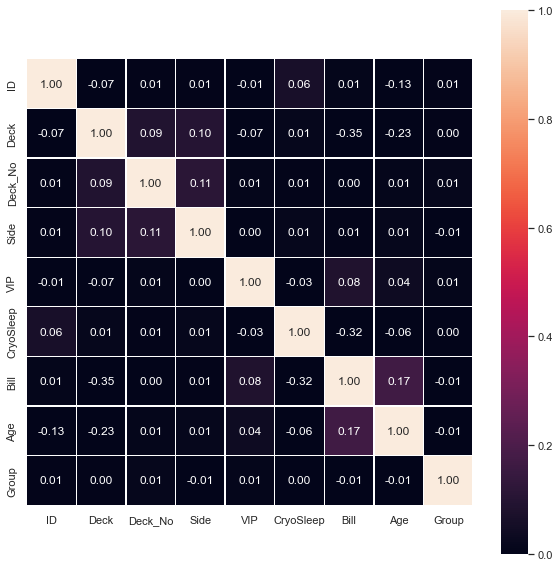

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset2[num_cols_heat].corr(), square=True, vmin=0, annot=True, fmt='.2f', vmax=1, linewidths=.3)
plt.show()

In [37]:
train_dataset1 = dataset2.query('drop == 0').drop(['drop'], axis=1)
test_dataset1 = dataset2.query('drop == 1').drop(['drop'], axis=1)

In [38]:
train_dataset1['Transported'] = le.fit_transform(train_dataset1['Transported'])

In [39]:
test_dataset1

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Group,ID,Deck,Deck_No,Side,Bill
0,Earth,1,TRAPPIST-1e,27.0,0,NaN,12,0,6,3,1,0.0
1,Earth,0,TRAPPIST-1e,19.0,0,NaN,17,0,5,4,1,2832.0
2,Europa,1,55 Cancri e,31.0,0,NaN,18,0,2,0,1,0.0
3,Europa,0,TRAPPIST-1e,38.0,0,NaN,20,0,2,1,1,7418.0
4,Earth,0,TRAPPIST-1e,20.0,0,NaN,22,0,5,5,1,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,TRAPPIST-1e,34.0,0,NaN,9265,1,6,6,1,0.0
4273,Earth,0,TRAPPIST-1e,42.0,0,NaN,9268,0,8,10,2,1018.0
4274,Mars,1,55 Cancri e,27.0,0,NaN,9270,0,3,6,0,0.0
4275,Europa,0,missing,27.0,0,NaN,9272,0,3,7,0,3203.0


In [40]:
test_dataset1 = test_dataset1.drop('Transported', axis=1)

## 独立変数と従属変数に分割

In [41]:
X1 = train_dataset1.drop('Transported', axis=1).values
y1 = train_dataset1['Transported'].values

In [42]:
X1

array([['Europa', 0, 'TRAPPIST-1e', ..., 0, 0, 0.0],
       ['Earth', 0, 'TRAPPIST-1e', ..., 0, 1, 736.0],
       ['Europa', 0, 'TRAPPIST-1e', ..., 0, 1, 10383.0],
       ...,
       ['Earth', 0, 'TRAPPIST-1e', ..., 0, 1, 1873.0],
       ['Europa', 0, '55 Cancri e', ..., 8, 1, 4637.0],
       ['Europa', 0, 'TRAPPIST-1e', ..., 8, 1, 4826.0]], dtype=object)

In [43]:
X1[0, :]

array(['Europa', 0, 'TRAPPIST-1e', 39.0, 0, 0, 0, 1, 0, 0, 0.0],
      dtype=object)

In [44]:
X1

array([['Europa', 0, 'TRAPPIST-1e', ..., 0, 0, 0.0],
       ['Earth', 0, 'TRAPPIST-1e', ..., 0, 1, 736.0],
       ['Europa', 0, 'TRAPPIST-1e', ..., 0, 1, 10383.0],
       ...,
       ['Earth', 0, 'TRAPPIST-1e', ..., 0, 1, 1873.0],
       ['Europa', 0, '55 Cancri e', ..., 8, 1, 4637.0],
       ['Europa', 0, 'TRAPPIST-1e', ..., 8, 1, 4826.0]], dtype=object)

## エンコーディング

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [0, 2])], remainder='passthrough')
X1 = np.array(ct.fit_transform(X1))

In [46]:
X1

array([[1.0, 0.0, 0.0, ..., 0, 0, 0.0],
       [0.0, 0.0, 0.0, ..., 0, 1, 736.0],
       [1.0, 0.0, 0.0, ..., 0, 1, 10383.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 1, 1873.0],
       [1.0, 0.0, 0.0, ..., 8, 1, 4637.0],
       [1.0, 0.0, 0.0, ..., 8, 1, 4826.0]], dtype=object)

In [47]:
X1[0, :]

array([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 39.0, 0, 0, 0, 1, 0, 0, 0.0],
      dtype=object)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)

In [49]:
X1

array([[ 1.754795  , -0.50366411, -0.15384842, ..., -1.56946715,
        -0.99372894, -0.52017438],
       [-0.56986714, -0.50366411, -0.15384842, ..., -1.56946715,
         0.84973791, -0.2478158 ],
       [ 1.754795  , -0.50366411, -0.15384842, ..., -1.56946715,
         0.84973791,  3.32207986],
       ...,
       [-0.56986714, -0.50366411, -0.15384842, ..., -1.56946715,
         0.84973791,  0.1729338 ],
       [ 1.754795  , -0.50366411, -0.15384842, ...,  1.13332916,
         0.84973791,  1.19575868],
       [ 1.754795  , -0.50366411, -0.15384842, ...,  1.13332916,
         0.84973791,  1.26569859]])

In [50]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [51]:
from catboost import CatBoostClassifier
params = {
    'early_stopping_rounds' : 10,
    'iterations' : 100, 
    'custom_loss' :['Accuracy'], 
    'random_seed' :42
}
model = CatBoostClassifier(**params)
cab = model.fit(X1_train, y1_train)

Learning rate set to 0.194791
0:	learn: 0.6483962	total: 60.1ms	remaining: 5.95s
1:	learn: 0.6164177	total: 61.4ms	remaining: 3.01s
2:	learn: 0.5916880	total: 63ms	remaining: 2.04s
3:	learn: 0.5736999	total: 64.7ms	remaining: 1.55s
4:	learn: 0.5600681	total: 66.2ms	remaining: 1.26s
5:	learn: 0.5507114	total: 67.6ms	remaining: 1.06s
6:	learn: 0.5427679	total: 69ms	remaining: 917ms
7:	learn: 0.5357194	total: 70.5ms	remaining: 811ms
8:	learn: 0.5288080	total: 72.1ms	remaining: 729ms
9:	learn: 0.5228971	total: 73.6ms	remaining: 663ms
10:	learn: 0.5188460	total: 74.9ms	remaining: 606ms
11:	learn: 0.5148809	total: 76.5ms	remaining: 561ms
12:	learn: 0.5104136	total: 77.9ms	remaining: 521ms
13:	learn: 0.5087981	total: 79.2ms	remaining: 487ms
14:	learn: 0.5070878	total: 80.9ms	remaining: 459ms
15:	learn: 0.5050644	total: 83.1ms	remaining: 436ms
16:	learn: 0.5030881	total: 84.6ms	remaining: 413ms
17:	learn: 0.5010541	total: 85.9ms	remaining: 391ms
18:	learn: 0.4996945	total: 87.6ms	remaining: 37

In [52]:
y1_pred= cab.predict(X1_test)

In [53]:
print(np.concatenate((y1_pred.reshape(len(y1_pred), 1), y1_test.reshape(len(y1_test), 1)), 1))

[[0 1]
 [0 0]
 [1 0]
 ...
 [0 0]
 [1 1]
 [1 0]]


In [54]:
y1_test

array([1, 0, 0, ..., 0, 1, 0])

In [55]:
y1

array([0, 1, 0, ..., 1, 0, 1])

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
print(cm)
accuracy_score(y1_test, y1_pred)

[[696 165]
 [274 604]]


0.7475560667050029

In [57]:
X2 = test_dataset1.values

In [58]:
X2

array([['Earth', 1, 'TRAPPIST-1e', ..., 3, 1, 0.0],
       ['Earth', 0, 'TRAPPIST-1e', ..., 4, 1, 2832.0],
       ['Europa', 1, '55 Cancri e', ..., 0, 1, 0.0],
       ...,
       ['Mars', 1, '55 Cancri e', ..., 6, 0, 0.0],
       ['Europa', 0, 'missing', ..., 7, 0, 3203.0],
       ['Earth', 1, 'PSO J318.5-22', ..., 8, 1, 0.0]], dtype=object)

In [59]:
X2[0, :]

array(['Earth', 1, 'TRAPPIST-1e', 27.0, 0, 12, 0, 6, 3, 1, 0.0],
      dtype=object)

In [60]:
X2 = np.array(ct.fit_transform(X2))

In [61]:
X2

array([[0.0, 0.0, 0.0, ..., 3, 1, 0.0],
       [0.0, 0.0, 0.0, ..., 4, 1, 2832.0],
       [1.0, 0.0, 0.0, ..., 0, 1, 0.0],
       ...,
       [0.0, 1.0, 0.0, ..., 6, 0, 0.0],
       [1.0, 0.0, 0.0, ..., 7, 0, 3203.0],
       [0.0, 0.0, 0.0, ..., 8, 1, 0.0]], dtype=object)

In [62]:
X2 = sc.fit_transform(X2)

In [63]:
X2

array([[-0.55313127, -0.52531386, -0.14409623, ..., -0.55017094,
         0.85340541, -0.50917561],
       [-0.55313127, -0.52531386, -0.14409623, ..., -0.20993365,
         0.85340541,  0.54653439],
       [ 1.80788912, -0.52531386, -0.14409623, ..., -1.57088281,
         0.85340541, -0.50917561],
       ...,
       [-0.55313127,  1.90362386, -0.14409623, ...,  0.47054093,
        -0.98631986, -0.50917561],
       [ 1.80788912, -0.52531386, -0.14409623, ...,  0.81077822,
        -0.98631986,  0.68483538],
       [-0.55313127, -0.52531386, -0.14409623, ...,  1.15101551,
         0.85340541, -0.50917561]])

In [64]:
y2_pred = cab.predict(X2)

In [65]:
submission = pd.DataFrame({'PassengerId':test_dataset['PassengerId'], 'Transported':y2_pred.ravel()})
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,0


In [66]:
submission['Transported'] = submission['Transported'].map({0:False, 1:True})

In [67]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [68]:
submission.to_csv('submission3.csv',index = False)